## K-Means<br>
k-centroid<br>
initialize the centroid<br>
compute the nearest df point distance<br> manhatten-high dimension euclidiean-low dimensional df<br>
find the nearest df point distance average<br>
move the centroid on the place of avg value<br>

## K-Means++
step 1 : select the centroid<br>
step 2 : compute distance from nearest centroid<br>
d(xi)=(x-ci)^2<br>
probability calculations<br>
p(xi)=d(xi)^2/sum(d(xi)^2)<br>
select the higehst df point<br>
run standard k-means<br>
for dfset{1,2,3,10,11,12}<br>
ci=2<br>
xi          |xi-2|       |xi-12|<br>

# import libraries

In [54]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [55]:
data=pd.read_csv(r"C:\Users\tarun\OneDrive\Desktop\tekworks\K-Means\Mall_Customers.csv")
df=pd.DataFrame(data)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# data preprocessing

In [56]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [58]:
df.shape

(200, 5)

In [59]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [60]:
df.drop(columns=["CustomerID","Gender"],inplace=True)

# scatter plot

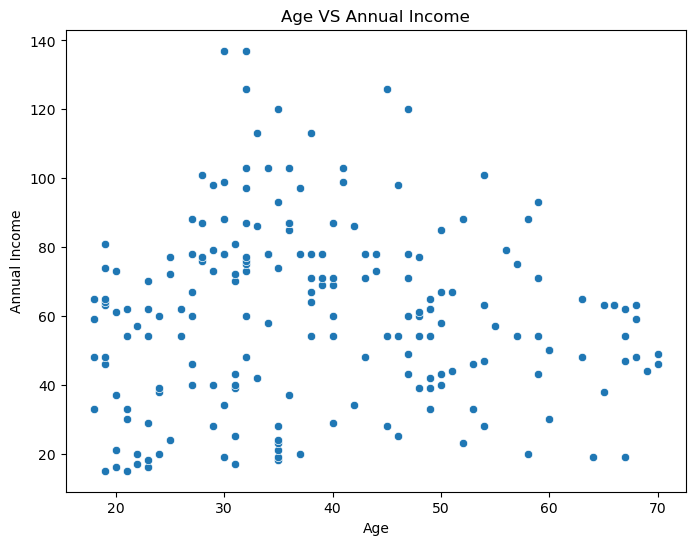

In [61]:
#build scatter plot between age and annual income
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df)
plt.title("Age VS Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

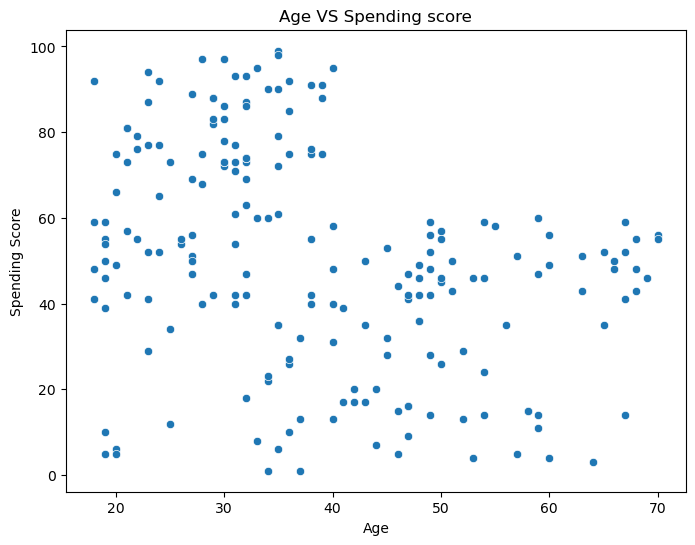

In [62]:
#build scatter plot between Annual income and spending score
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df)
plt.title("Age VS Spending score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

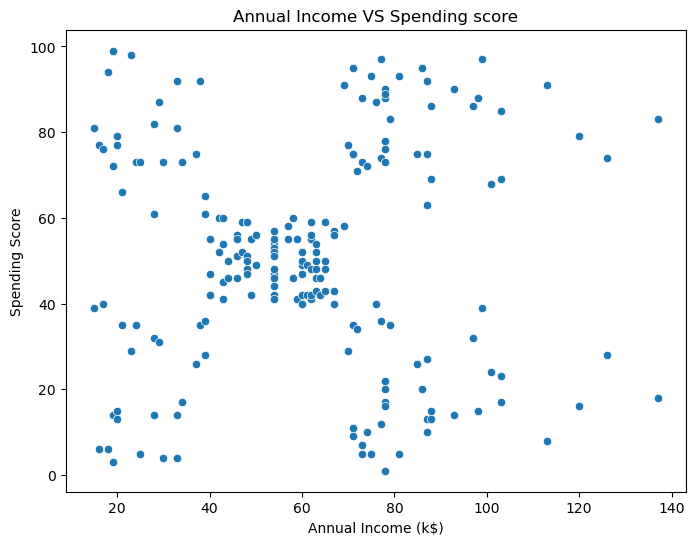

In [63]:
#build scatter plot between age and spending score
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)
plt.title("Annual Income VS Spending score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

# feature engineering

In [64]:
df.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [65]:
#find the skewness of the data and check whether the daata is skewed or not which skewness is there
def skewness_name(skewness):
    if skewness>0:
        return "Right skewed"
    if skewness<0:
        return "Left skewed"
    else:
        return "Normal"
print("skewness of age:",skewness_name(df["Age"].skew()))
print("skewness of Annual income:",skewness_name(df["Annual Income (k$)"].skew()))
print("skewness of spending score:",skewness_name(df["Spending Score (1-100)"].skew()))

skewness of age: Right skewed
skewness of Annual income: Right skewed
skewness of spending score: Left skewed


In [67]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data,columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# Train the model

In [73]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 5, random_state=42)

model.fit(df)
df["Cluster"]=model.labels_



c:\Users\tarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\tarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tarun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

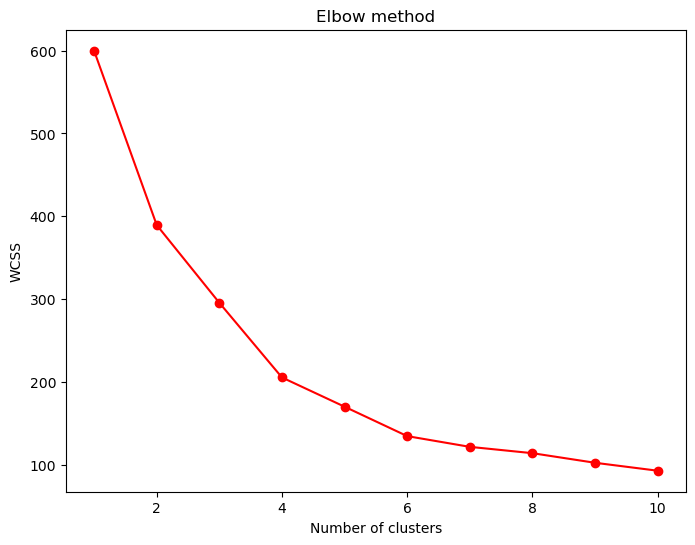

In [74]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df.drop("Cluster",axis=1))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker="o",color="red")
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

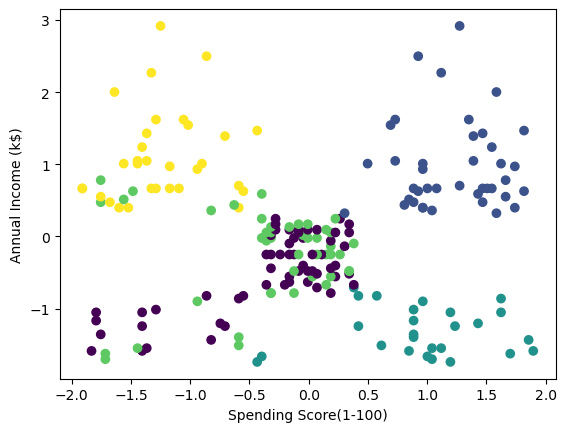

In [75]:
#display cluster
plt.scatter(df["Spending Score (1-100)"],
            df["Annual Income (k$)"],
            c=df["Cluster"])
plt.xlabel('Spending Score(1-100)')
plt.ylabel('Annual Income (k$)')

In [76]:
df.to_csv("cluster_mall_customers.csv",index=False)